In [1]:
import cx_Oracle
import os
os.putenv('NLS_LANG', '.UTF8')

connection = cx_Oracle.connect('hr','hr','localhost/xe')
cursor=connection.cursor()

In [2]:
import requests
client_id = 'rsiUjuINDag8anLQgN_O'
client_secret = 'wji5s_qele'

headers = {'X-Naver-Client-ID':client_id, 'X-Naver-Client-Secret':client_secret}
url1 = 'https://openapi.naver.com/v1/search/blog?query=여자친구선물'
result = requests.get(url1,headers=headers)
information = result.json()
total = information['total']
print('총 검색 결과 : ', total)

총 검색 결과 :  1552891


In [3]:
total_page=0
if total%20 == 0:
    total_page = total // 20
else:
    total_page = total // 20 + 1

In [4]:
total_page

77645

In [5]:
def get_api_result(keyword, display, start):
    url = 'https://openapi.naver.com/v1/search/blog?query=' + keyword \
    + '&display=' + str(display) \
    + '&start=' + str(start)
    
    result = requests.get(url, headers = headers)
    return result.json()

In [6]:


droptable_sql = "drop table present"
create_sql = "create table present(id number,title varchar2(1000), description varchar2(2000))"
dropseq_sql = "drop sequence blog_seq";
createseq_sql = "create sequence blog_seq";
try:
    cursor.execute(droptable_sql)
except:
    pass
cursor.execute(dropseq_sql)
cursor.execute(createseq_sql)
cursor.execute(create_sql)
connection.commit()

In [7]:
def call_and_print(keyword, page):
    json_obj = get_api_result(keyword, 20,(page-1)*20+1)
    for item in json_obj['items']:
        title = item['title'].replace('<b>', '').replace('</b>', '').replace("'","&quot;")
        description = item['description'].replace('<b>','').replace('</b>', '').replace("'","&quot;")
        print(title, description)
        insert_sql = f"insert into present values(blog_seq.nextval,'{title}','{description}')"
        print(insert_sql)
        cursor.execute(insert_sql)
        connection.commit()

In [8]:
import time

In [9]:
keyword = '여자친구선물'

In [10]:
for page in range(1,total_page):
    print(page, " page")
    call_and_print(keyword, page)
    time.sleep(0.5)

1  page
여자친구 선물, 최상의 만족도 패션에 관심이 무척 많은 회사 여자 후배가 있다. 독특하게 입고 다니는 건 아닌데 늘 회사한 느낌이... 남자친구와 놀러갈 계획이란다. 여자친구선물로 다이아미주얼리를 선물하면 크리스마스가 더 행복해질 수... 
insert into present values(blog_seq.nextval,'여자친구 선물, 최상의 만족도','패션에 관심이 무척 많은 회사 여자 후배가 있다. 독특하게 입고 다니는 건 아닌데 늘 회사한 느낌이... 남자친구와 놀러갈 계획이란다. 여자친구선물로 다이아미주얼리를 선물하면 크리스마스가 더 행복해질 수... ')
20대 여자친구 선물 다이아미주얼리 추천해요! 20대여자친구선물 을 자랑을 하려고 해요 그 어떤 선물들 보다 좋아요 악세사리를 평소에 즐기는... 20대여자친구선물을 너무 잘 착용하고 다녀요 친구들이 못 보던거라며 멀리서 봐도 눈에 쏙 들어 온다고... 
insert into present values(blog_seq.nextval,'20대 여자친구 선물 다이아미주얼리 추천해요!','20대여자친구선물 을 자랑을 하려고 해요 그 어떤 선물들 보다 좋아요 악세사리를 평소에 즐기는... 20대여자친구선물을 너무 잘 착용하고 다녀요 친구들이 못 보던거라며 멀리서 봐도 눈에 쏙 들어 온다고... ')
건강한 숙면을 위해 라마망 꿀잠오일 여자친구 선물로 추천해요 또는 여자친구선물로 선물용 종이백을 구매해서 선물해도 좋아요 향이 이뻐서 향이 좋아서 호불호 없는 향이라 적극 추천해요 불면증을 위해서도 좋지만 제대로 된 향으로 건강한 수면을 위해 사용하기... 
insert into present values(blog_seq.nextval,'건강한 숙면을 위해 라마망 꿀잠오일 여자친구 선물로 추천해요','또는 여자친구선물로 선물용 종이백을 구매해서 선물해도 좋아요 향이 이뻐서 향이 좋아서 호불호 없는 향이라 적극 추천해요 불면증을 위해서도 좋지만 제대로 된 향으로 건강한 수면을 위해 사용하기... ')

3  page
주얼리 티르리르 실버 목걸이! 크리스마스 여자친구 선물 추천 매일매일 옆에 두고, 남자친구, 여자친구 생각할 것 같아요!! 넘나 로맨틱하자나!!! ♡ 다가오는 크리스마스를 앞두고, 크리스마스 선물 하려고 준비중인 분들이나 아니면 연말 스타일링이 신경 쓰여서... 
insert into present values(blog_seq.nextval,'주얼리 티르리르 실버 목걸이! 크리스마스 여자친구 선물 추천','매일매일 옆에 두고, 남자친구, 여자친구 생각할 것 같아요!! 넘나 로맨틱하자나!!! ♡ 다가오는 크리스마스를 앞두고, 크리스마스 선물 하려고 준비중인 분들이나 아니면 연말 스타일링이 신경 쓰여서... ')
티르리르 목걸이, 사랑스러운 크리스마스 여자친구 선물♥ 그래서 크리스마스 여자친구 선물로도 많이 언급되는게 바로 목걸이가 아닐까 싶은데, 이번에 너~무... 있으니 여자친구 크리스마스 선물을 아직 고르지 못한 분이라면 티르리르 목걸이 어떠신가요?... 
insert into present values(blog_seq.nextval,'티르리르 목걸이, 사랑스러운 크리스마스 여자친구 선물♥','그래서 크리스마스 여자친구 선물로도 많이 언급되는게 바로 목걸이가 아닐까 싶은데, 이번에 너~무... 있으니 여자친구 크리스마스 선물을 아직 고르지 못한 분이라면 티르리르 목걸이 어떠신가요?... ')
입생로랑 향수 몽파리 오드빠르펭! 여자친구 선물 추천해요 아직 크리스마스 &amp; 연말 선물 고민하시는 분들은 여기여기 보세요 :) 여자 향수 &amp; 여자친구 선물로 언제나 옳은 입생로랑 향수 (❁´◡`❁) 몽 파리 오 드 빠르펭을 소개합니닷 저는 입생로랑 몽파리를 비롯해... 
insert into present values(blog_seq.nextval,'입생로랑 향수 몽파리 오드빠르펭! 여자친구 선물 추천해요','아직 크리스마스 &amp; 연말 선물 고민하시는 분들은 여기여기 보세요 :) 여자 향수 &amp; 여자친구 선물로 언제나 옳은 입생로랑

5  page
주얼리 미러보관함 보석함&quot; 여자친구선물로 추천! 실용적이면서도 모던한 감각의 디자인을 추구합니다. smartstore.naver.com #악세사리보관함 #주얼리보관함 #여자친구선물 #생일선물 #크리스마스선물 #주얼리미러보관함 #주얼리보석함 #미러보석함 #랍슨디자인
insert into present values(blog_seq.nextval,'주얼리 미러보관함 보석함&quot; 여자친구선물로 추천!','실용적이면서도 모던한 감각의 디자인을 추구합니다. smartstore.naver.com #악세사리보관함 #주얼리보관함 #여자친구선물 #생일선물 #크리스마스선물 #주얼리미러보관함 #주얼리보석함 #미러보석함 #랍슨디자인')
프리저브드 드라이플라워액자 기념일 여자친구선물 프리저브드 드라이플라워액자 기념일 여자친구선물 어느덧 11월 중순! 연말이 곧 다가오고 있는대요.... 여자친구 생일 선물이나 회사 동료분들에게 드리는분들도 계시구요. 프리저브드 드라이플라워액자... 
insert into present values(blog_seq.nextval,'프리저브드 드라이플라워액자 기념일 여자친구선물','프리저브드 드라이플라워액자 기념일 여자친구선물 어느덧 11월 중순! 연말이 곧 다가오고 있는대요.... 여자친구 생일 선물이나 회사 동료분들에게 드리는분들도 계시구요. 프리저브드 드라이플라워액자... ')
크리스마스 여자친구 선물로 좋은 폴스부띠끄 가방 코디 :) 다가 올 크리스마스 여자친구 선물로 고민하는 분들 많으시죠? 오늘은 크리스마스 여자친구 선물로... 이 날 만난 친구가 괌에서 사온 고디바 초콜렛까지 넉넉하게 들어가는~ 내장된 스트랩을 사용해서 어깨에... 
insert into present values(blog_seq.nextval,'크리스마스 여자친구 선물로 좋은 폴스부띠끄 가방 코디 :)','다가 올 크리스마스 여자친구 선물로 고민하는 분들 많으시죠? 오늘은 크리스마스 여자친구 선물로... 이 날 만난 친구가 괌에서 사온 고디바 초콜

7  page
여자친구 선물로 딱 좋은 14k 귀걸이 추천 ! 페르테...  오늘은 심플하면서도 그냥 나 자체를 돋보이게 만들어주는 조금 더 특별한 주얼리를 보여드리려고 해요 :-) 여자친구 선물로도 제격이라서 생일 선물 뭐 할까, 고민이셨다면 오늘 제 포스팅 주목해주시면... 
insert into present values(blog_seq.nextval,'여자친구 선물로 딱 좋은 14k 귀걸이 추천 ! 페르테... ','오늘은 심플하면서도 그냥 나 자체를 돋보이게 만들어주는 조금 더 특별한 주얼리를 보여드리려고 해요 :-) 여자친구 선물로도 제격이라서 생일 선물 뭐 할까, 고민이셨다면 오늘 제 포스팅 주목해주시면... ')
[달콤 공방] 실속 리본 패키지 선물세트 | 여자친구 선물 추천...  안녕하세요 달콤공방입니다 :) 달콤 공방에서 준비한 여자친구를 위한 선물 세트 혹은 친구에게... 선물세트입니다 :) 꽃다발과 함께 보내드려 만족도가 높은 패키지 상품입니다. 여자친구 선물 혹은... 
insert into present values(blog_seq.nextval,'[달콤 공방] 실속 리본 패키지 선물세트 | 여자친구 선물 추천... ','안녕하세요 달콤공방입니다 :) 달콤 공방에서 준비한 여자친구를 위한 선물 세트 혹은 친구에게... 선물세트입니다 :) 꽃다발과 함께 보내드려 만족도가 높은 패키지 상품입니다. 여자친구 선물 혹은... ')
여자친구선물추천! 굿라이프3 꽃무드등,인테리어소품으로도 OK! 생일선물,집들이선물이나 특히 여자친구선물로 추천하고 싶은 굿라이프 꽃무드등 ☆☆☆ 선물을 할때 따로 포장박스를 사는것도 여간 번거로운게 아닌데 굿라이프에서는 PVC포장용기까지 함께 보내주는 센스!... 
insert into present values(blog_seq.nextval,'여자친구선물추천! 굿라이프3 꽃무드등,인테리어소품으로도 OK!','생일선물,집들이선물이나 특히 여자친구선물로 추천하고 싶은 굿라이프 꽃무드등 ☆☆☆ 선물을 할때 따로 포장박

9  page
여자친구선물 다니엘웰링턴 연말이벤트로 준비! +할인코드 ㅠ_ㅠ 믿고 싶지 않지만 그래도 파티는 언제나 설레는 것,,,  그러면서 남자친구와 서로 선물... 오늘 제목에 적어둔 대로 할인코드까지 알려드릴 테니 센스 있는 여자친구 선물 준비해보시길 바라요.... 
insert into present values(blog_seq.nextval,'여자친구선물 다니엘웰링턴 연말이벤트로 준비! +할인코드','ㅠ_ㅠ 믿고 싶지 않지만 그래도 파티는 언제나 설레는 것,,,  그러면서 남자친구와 서로 선물... 오늘 제목에 적어둔 대로 할인코드까지 알려드릴 테니 센스 있는 여자친구 선물 준비해보시길 바라요.... ')
찰스키링, 여자친구선물, 남자친구선물, 에어팟케이스추천...  커플템이라 남자친구분들이 여자친구에게 선물해주는 경우가 많은 케이스라고 해요 노랑 감성이... 남자친구, 여자친구 선물로도 좋은 커플아이템! 1mm in life 정말 마음에 들어요! 1mm in life 1mm in life... 
insert into present values(blog_seq.nextval,'찰스키링, 여자친구선물, 남자친구선물, 에어팟케이스추천... ','커플템이라 남자친구분들이 여자친구에게 선물해주는 경우가 많은 케이스라고 해요 노랑 감성이... 남자친구, 여자친구 선물로도 좋은 커플아이템! 1mm in life 정말 마음에 들어요! 1mm in life 1mm in life... ')
손목시계 추천 여자친구 크리스마스 선물 / 시아르고 SG-003 꼭 같은색이 아니더라도 커플시계는 같은디자인 추천해요~~♡ ▶ [석와치스] 시아르고 시계 링크 ◀ BRAND - SIARGO SIARGO www.seokwatches.com #시아르고 #여자친구선물 #남자친구선물 #기념일선물 #여자시계... 
insert into present values(blog_seq.nextval,'손목시계 추천 여자친구 크리스마스 선물 / 시아르고 SG-003','꼭 같은색이 아니더라도 커플

11  page
2019년 크리스마스 연령대별 남자친구, 여자친구 선물 추천 ■ 크리스마스 연령대별 남자 친구, 여자 친구 선물 1) 10대 크리스마스 선물 : 무선 이어폰 요즘 가장... 직장을 다니는 남자 친구나 여자 친구에게 명함도 몇 장 들어가고, 카드도 2-3장 넣을 수 있는 세련된... 
insert into present values(blog_seq.nextval,'2019년 크리스마스 연령대별 남자친구, 여자친구 선물 추천','■ 크리스마스 연령대별 남자 친구, 여자 친구 선물 1) 10대 크리스마스 선물 : 무선 이어폰 요즘 가장... 직장을 다니는 남자 친구나 여자 친구에게 명함도 몇 장 들어가고, 카드도 2-3장 넣을 수 있는 세련된... ')
골드미유 드롭귀걸이 여자친구선물 하면 감동받을걸 ♡ 예전에 남자친구가 화이트데이에 이런 비슷한 선물을 해준적이 있는데 개봉하면서 얼마나 기분이... 제작기간만 7~10일정도가 걸리니 미리미리 준비하는 센스 ☆ 여자친구 선물로 고급스러운 골드미유... 
insert into present values(blog_seq.nextval,'골드미유 드롭귀걸이 여자친구선물 하면 감동받을걸 ♡','예전에 남자친구가 화이트데이에 이런 비슷한 선물을 해준적이 있는데 개봉하면서 얼마나 기분이... 제작기간만 7~10일정도가 걸리니 미리미리 준비하는 센스 ☆ 여자친구 선물로 고급스러운 골드미유... ')
여자친구 선물 조이바이디올 추천, 저의 힐링용 최애 디올 향수 향수 선물은 언제 받아도 행복하더라고요. 혹시나 여자친구 선물 고민 중이시라면 이번 최애 향수 추천... 저에게는 맡으면 맡을수록 왠지 기쁜 일이 생길 것만 같고 힐링이 되는 여자 향수에요. 저만의 꿀팁을... 
insert into present values(blog_seq.nextval,'여자친구 선물 조이바이디올 추천, 저의 힐링용 최애 디올 향수','향수 선물은 언제 받아도 행복하더라고요. 혹시나 여자친구 선물 고민 중이시라면 이번 최애 향수 추천..

13  page
여자친구 선물 - 루이비통 귀걸이 평생 써야지 고맙습니당❤ #여자친구선물 #크리스마스선물 #여자친구크리스마스선물 #루이비통 #루이비통귀걸이 #20대여자선물 #명품귀걸이 #루이비통패션주얼리 #louisvuitton #여자친구생일선물 #여친선물추천
insert into present values(blog_seq.nextval,'여자친구 선물 - 루이비통 귀걸이','평생 써야지 고맙습니당❤ #여자친구선물 #크리스마스선물 #여자친구크리스마스선물 #루이비통 #루이비통귀걸이 #20대여자선물 #명품귀걸이 #루이비통패션주얼리 #louisvuitton #여자친구생일선물 #여친선물추천')
가네시 크리스마스 여자친구 선물 추천 커플링 어때? 특히나 크리스마스 선물, 기념일 선물로 여자친구에게 주기 딱 좋은 것 같아요 가네시에서 여자친구 선물 구매한 다음 이벤트 당첨이 돼서 이 목걸이까지 받게 되면 진짜 개이득! 꽃잎 하나하나가 모여서... 
insert into present values(blog_seq.nextval,'가네시 크리스마스 여자친구 선물 추천 커플링 어때?','특히나 크리스마스 선물, 기념일 선물로 여자친구에게 주기 딱 좋은 것 같아요 가네시에서 여자친구 선물 구매한 다음 이벤트 당첨이 돼서 이 목걸이까지 받게 되면 진짜 개이득! 꽃잎 하나하나가 모여서... ')
다니엘 웰링턴 빼빼로데이 이벤트 여자친구 선물로 준비해요 아직 빼빼로데이 여자친구 선물을 준비하지 못했다면 다니엘 웰링턴 빼빼로데이 이벤트로 준비해보세요&gt;&lt; 저는 사실 이번에 동생에게 선물해주기 위해 시계와 브레이슬릿 세트를 들였어요~ 포장과 내부... 
insert into present values(blog_seq.nextval,'다니엘 웰링턴 빼빼로데이 이벤트 여자친구 선물로 준비해요','아직 빼빼로데이 여자친구 선물을 준비하지 못했다면 다니엘 웰링턴 빼빼로데이 이벤트로 준비해보세요&gt;&lt; 저는 사실 이번에 동생에게 선물해주기 위해 시계와 브레이슬릿 세트를 들였어요~

15  page
여자친구선물 센트세이 플로럴 머스크 자꾸 머물고 싶은 향 사랑하는 여자라 향으로 추억을 떠올리는 경향이 있어요. 그래서 향수를 선물 받을 때 되게 기분이 좋은데 자꾸 옆에 머물고 싶은 여자친구선물로 딱! 좋을 그런 향수를 하나 소개해드리려고 해요. 신세계나 LF... 
insert into present values(blog_seq.nextval,'여자친구선물 센트세이 플로럴 머스크 자꾸 머물고 싶은 향','사랑하는 여자라 향으로 추억을 떠올리는 경향이 있어요. 그래서 향수를 선물 받을 때 되게 기분이 좋은데 자꾸 옆에 머물고 싶은 여자친구선물로 딱! 좋을 그런 향수를 하나 소개해드리려고 해요. 신세계나 LF... ')
여자친구선물 백조의호수 오르골 ♡ 선물하실분들 눈여겨봐주세용 프로포즈선물 여자친구선물 결혼기념일선물 집들이선물 등 이런 오르골들은 여러가지 선물용도로 참 좋아용 ~ 작동중에 사진찍은거라 라이트 불빛이 촤라라라라 오른쪽에 버튼을... 
insert into present values(blog_seq.nextval,'여자친구선물 백조의호수 오르골 ♡','선물하실분들 눈여겨봐주세용 프로포즈선물 여자친구선물 결혼기념일선물 집들이선물 등 이런 오르골들은 여러가지 선물용도로 참 좋아용 ~ 작동중에 사진찍은거라 라이트 불빛이 촤라라라라 오른쪽에 버튼을... ')
여자친구 선물 스톤헨지 전지현 목걸이 이제 곧 크리스마스고 연말이니 여자친구 크리스마스 선물로도 좋을듯 여자친구선물, 여자친구목걸이 추천합니당 이렇게 예쁘고 맘에 드는 목걸이를 선물해준 남자친구에게도 무한 감사와 사랑을
insert into present values(blog_seq.nextval,'여자친구 선물 스톤헨지 전지현 목걸이','이제 곧 크리스마스고 연말이니 여자친구 크리스마스 선물로도 좋을듯 여자친구선물, 여자친구목걸이 추천합니당 이렇게 예쁘고 맘에 드는 목걸이를 선물해준 남자친구에게도 무한 감사와 사랑을')
신상품 추천 :: 여성 손목시계 할인코드 받아 여자친구 선물 

17  page
여자친구선물 주얼리브랜드 웨스트아일랜드 귀걸이 추천 같이 만난 친구들도 예쁘다고 할 정도였답니다 ㅋㅋㅋㅋ 정말 가성비 너무 마음에 드는 브랜드예용!! 여자친구선물 고민하시는 남친분덜께 추천을 해보며.. 저는 목걸이 디자인좀 보러 가야겠어요... 
insert into present values(blog_seq.nextval,'여자친구선물 주얼리브랜드 웨스트아일랜드 귀걸이 추천','같이 만난 친구들도 예쁘다고 할 정도였답니다 ㅋㅋㅋㅋ 정말 가성비 너무 마음에 드는 브랜드예용!! 여자친구선물 고민하시는 남친분덜께 추천을 해보며.. 저는 목걸이 디자인좀 보러 가야겠어요... ')
여자친구선물로 이벤트 가능한 골드미유 14k목걸이! 목걸이 너무 예뻐서 셀카 엄청 많이 찍었어욬ㅋㅋㅋㅋ 여자친구목걸이나 여자친구선물 찾고 계시다면 골드미유에서 특별한 선물로 선택해보세요! 골드미유 14k 18k 주얼리 반지 목걸이 팔찌 귀걸이 전문적 제조... 
insert into present values(blog_seq.nextval,'여자친구선물로 이벤트 가능한 골드미유 14k목걸이!','목걸이 너무 예뻐서 셀카 엄청 많이 찍었어욬ㅋㅋㅋㅋ 여자친구목걸이나 여자친구선물 찾고 계시다면 골드미유에서 특별한 선물로 선택해보세요! 골드미유 14k 18k 주얼리 반지 목걸이 팔찌 귀걸이 전문적 제조... ')
여자친구 크리스마스 선물 ,목걸이 추천 여자친구 크리스마스 선물 ,목걸이 추천 고급스러운 디자인과 볼륨감있는 디자인으로 여자친구선물로 아내를 위한 선물로 프로포즈목걸이로 사랑받는 하트 14k블루다이아하트 목걸이입니다. 마음을 전하고... 
insert into present values(blog_seq.nextval,'여자친구 크리스마스 선물 ,목걸이 추천','여자친구 크리스마스 선물 ,목걸이 추천 고급스러운 디자인과 볼륨감있는 디자인으로 여자친구선물로 아내를 위한 선물로 프로포즈목걸이로 사랑받는 하트 14k블루다이아하트 목걸이입니다. 마음을 전하고... ')
여자친구 선

19  page
여자친구 꽃선물 장미꽃다발 이벤트준비하기 동탄꽃집 시들지않는 비누장미꽃다발 결혼기념일선물/ 여자친구선물 아베끄초이의 꽃다발은... 사이즈로 여자친구 고백 결혼기념일 생일 프로포즈 선물로 잘어울리지요 :) 동탄지역은 직접픽업오셔도... 
insert into present values(blog_seq.nextval,'여자친구 꽃선물 장미꽃다발 이벤트준비하기','동탄꽃집 시들지않는 비누장미꽃다발 결혼기념일선물/ 여자친구선물 아베끄초이의 꽃다발은... 사이즈로 여자친구 고백 결혼기념일 생일 프로포즈 선물로 잘어울리지요 :) 동탄지역은 직접픽업오셔도... ')
노드그린 여자시계 추천 여자친구 선물 15%할인 받아가세요! 여자친구 선물로 여자시계 선물 하고 싶으신 분들도 이왕이면 할인 받아서 구매하면 좋으니까요^^ 할인코드 : una216 요 시계 할인코드 꼭 기억해 두시구요~ 사용하는 방법도 하단에 남겨놓았어요~ 고급스러운... 
insert into present values(blog_seq.nextval,'노드그린 여자시계 추천 여자친구 선물 15%할인 받아가세요!','여자친구 선물로 여자시계 선물 하고 싶으신 분들도 이왕이면 할인 받아서 구매하면 좋으니까요^^ 할인코드 : una216 요 시계 할인코드 꼭 기억해 두시구요~ 사용하는 방법도 하단에 남겨놓았어요~ 고급스러운... ')
군밤장수모자 군밤모자 여자친구선물 남자친구선물 커플아이템 캡틴모자 무스탕 트래퍼햇 여성 남성 귀달이모자 군밤장수모자 군밤모자 여자친구선물 남자친구선물 커플아이템 ★제품 상세정보 보기★ 종류 상세 설명 참조 소재 상세 설명 참조 치수 상세 설명 참조... 
insert into present values(blog_seq.nextval,'군밤장수모자 군밤모자 여자친구선물 남자친구선물 커플아이템','캡틴모자 무스탕 트래퍼햇 여성 남성 귀달이모자 군밤장수모자 군밤모자 여자친구선물 남자친구선물 커플아이템 ★제품 상세정보 보기★ 종류 상세 설명 참조 소재 상세 설명 참조 치수 상

21  page
여자친구선물 하기 괜찮은 클루나드 여자손목시계~^^ 시간도 째깍째깍 딱딱 맞춰 아주 잘 갑니다~ 3기압 생활방수 시계라 시계 착용한 상태로 물 만지는게 두럽지 않네요!^^ 성능좋고 예쁘고..뭐하나 아쉬울게 없는 여자친구선물~ 클루나드 여자손목시계... 
insert into present values(blog_seq.nextval,'여자친구선물 하기 괜찮은 클루나드 여자손목시계~^^','시간도 째깍째깍 딱딱 맞춰 아주 잘 갑니다~ 3기압 생활방수 시계라 시계 착용한 상태로 물 만지는게 두럽지 않네요!^^ 성능좋고 예쁘고..뭐하나 아쉬울게 없는 여자친구선물~ 클루나드 여자손목시계... ')
메트로시티 케이트모스 가방 여자친구선물 사주세요 봄과 어울리는 여자친구 선물로 좋아요. (왼) M191MF0403P3 / (오) M191MF0406P3 새내기 대학생 선물과 20대여자 데일리백으로도 예쁘지 않나요. 화사해서 다가올 봄이랑 잘 어울리는 것 같아요. 탈부착이 가능한... 
insert into present values(blog_seq.nextval,'메트로시티 케이트모스 가방 여자친구선물 사주세요','봄과 어울리는 여자친구 선물로 좋아요. (왼) M191MF0403P3 / (오) M191MF0406P3 새내기 대학생 선물과 20대여자 데일리백으로도 예쁘지 않나요. 화사해서 다가올 봄이랑 잘 어울리는 것 같아요. 탈부착이 가능한... ')
크리스마스 여자친구선물추천 토마스사보 투게더 주얼리라면 OK! 크리스마스 여자친구선물추천하는 토마스사보 투게더 주얼리를 오늘 자세히 소개해 드릴게요~ 물론... 세트로 선물하면 여자친구가 더더 좋아하실 거에요 ㅋ 음~ 전 이 중에서 첫번째 디자인이 제일 마음에... 
insert into present values(blog_seq.nextval,'크리스마스 여자친구선물추천 토마스사보 투게더 주얼리라면 OK!','크리스마스 여자친구선물추천하는 토마스사보 투게더 주얼리를 오늘 자세히 소개해 드릴게요~ 물론... 세트

23  page
사랑스러움 덩어리✨ . /프로포즈꽃다발/여자친구선물/결혼기념일 #프로포즈꽃다발#여자친구선물#결혼기념일 #프렌치다발 받고싶은#꽃다발 #빅사이즈꽃다발 . . #김포꽃집#장기동꽃집#장기동꽃집 . . #플로리스트#플라워클래스#꽃집창업#운양동꽃집#구래동꽃집#마산동꽃집... 
insert into present values(blog_seq.nextval,'사랑스러움 덩어리✨ . /프로포즈꽃다발/여자친구선물/결혼기념일','#프로포즈꽃다발#여자친구선물#결혼기념일 #프렌치다발 받고싶은#꽃다발 #빅사이즈꽃다발 . . #김포꽃집#장기동꽃집#장기동꽃집 . . #플로리스트#플라워클래스#꽃집창업#운양동꽃집#구래동꽃집#마산동꽃집... ')
시계 선물 추천 20대 여자친구 선물 최대 할인받고 구매해요~ 거기다 할인코드까지 넣으면 최대 15%할인까지 받을 수 있으니 친구한테 이쁜 선물도 주고 할인까지 받을 수 있으니 일석이조 ~ 이왕 20대 여자친구 선물 사는거,, 시계 선물 추천 특별하고 의미있는... 
insert into present values(blog_seq.nextval,'시계 선물 추천 20대 여자친구 선물 최대 할인받고 구매해요~','거기다 할인코드까지 넣으면 최대 15%할인까지 받을 수 있으니 친구한테 이쁜 선물도 주고 할인까지 받을 수 있으니 일석이조 ~ 이왕 20대 여자친구 선물 사는거,, 시계 선물 추천 특별하고 의미있는... ')
2주년기념 여자친구선물 &quot;원모먼트에서 대형꽃다발&quot; 여심저격 신나있는 여자친구 선물을 받는 여자친구도 기분이 좋았지만 선물을 준 저도 기분이 매우매우 좋더라구요 !!! 포장은 이렇게 깔끔하게 해서 온답니다 ㅎㅎㅎ 커다란 박스에 튼튼하게 담겨서 왔습니다 ㅎㅎㅎ!!!... 
insert into present values(blog_seq.nextval,'2주년기념 여자친구선물 &quot;원모먼트에서 대형꽃다발&quot; 여심저격','신나있는 여자친구 선물을 받는 여자친구도 기분이 좋았지만 선물을 준 저도 기분이

25  page
주얼리브랜드 웨스트아일랜드 : 여자친구 선물 ♥ 추천 특히나 여자친구 선물로 어떤 것이 좋을까 찾고 계시는 분들이 계시다면 주목해주세요!! 오늘... 가성비 좋은 제품이라 선물로도 괜찮겠쥬!♥ 현재 Hmall, LOTTE.com, 신세계 Duty Free 등에서 국내... 
insert into present values(blog_seq.nextval,'주얼리브랜드 웨스트아일랜드 : 여자친구 선물 ♥ 추천','특히나 여자친구 선물로 어떤 것이 좋을까 찾고 계시는 분들이 계시다면 주목해주세요!! 오늘... 가성비 좋은 제품이라 선물로도 괜찮겠쥬!♥ 현재 Hmall, LOTTE.com, 신세계 Duty Free 등에서 국내... ')
여자친구 선물 추천 | 구찌 마몬트 마틀라세 카드홀더 GG 구찌 마몬트 마틀라세 카드홀더 여자친구 선물 추천,구찌 카드홀더 안녕하세요. 블로거 옥수에요 ! 오늘은 구찌 카드홀더를 들고왔어요. 가볍게 들고다닐 카드지갑이 필요했는데, 사랑꾼께서 선물을 .. ꩅ... 
insert into present values(blog_seq.nextval,'여자친구 선물 추천 | 구찌 마몬트 마틀라세 카드홀더','GG 구찌 마몬트 마틀라세 카드홀더 여자친구 선물 추천,구찌 카드홀더 안녕하세요. 블로거 옥수에요 ! 오늘은 구찌 카드홀더를 들고왔어요. 가볍게 들고다닐 카드지갑이 필요했는데, 사랑꾼께서 선물을 .. ꩅ... ')
여자친구선물하기 좋은 아이템은? 여자친구선물하기 좋은 아이템은? 여자친구선물 안녕하세요 11월도 마지막을 향해 달려가고 있습니다... 아직도 여자친구를 위한 선물로 고민되시나요? 고민하지 마시고 주얼리를 선택해보시기 바랍니다 특별한... 
insert into present values(blog_seq.nextval,'여자친구선물하기 좋은 아이템은?','여자친구선물하기 좋은 아이템은? 여자친구선물 안녕하세요 11월도 마지막을 향해 달려가고 있습니다... 아직도 여자친구를 위한 선물로 고민되시나요? 고민하지 마시고

27  page
아미로 이사배 조명거울, 여자친구 선물로 최고죠 최근에 받은 선물 중 가장 마음에 들어서 ㅋㅋㅋ 아껴서 오래 쓸거예요. 망설이지 말고 여자친구 선물로 준비해보세요. 그리고 45도까지 각도조절이 되기 때문에 원하는 이마, 코, 턱 등 조금 더 가까이에서... 
insert into present values(blog_seq.nextval,'아미로 이사배 조명거울, 여자친구 선물로 최고죠','최근에 받은 선물 중 가장 마음에 들어서 ㅋㅋㅋ 아껴서 오래 쓸거예요. 망설이지 말고 여자친구 선물로 준비해보세요. 그리고 45도까지 각도조절이 되기 때문에 원하는 이마, 코, 턱 등 조금 더 가까이에서... ')
여자친구선물추천 메트로시티 미니백 지갑 향수 중 난...  내 여자친구가 원하는 아이템을 선택해서 선물하기 좋답니다^^그녀의 취향을 잘 파악해서 선물한다면 완벽한 여자친구선물 아이템이 될 거에요~ 미니백과 지갑 뿐 아니라 메트로시티 신발 아이템도 너무... 
insert into present values(blog_seq.nextval,'여자친구선물추천 메트로시티 미니백 지갑 향수 중 난... ','내 여자친구가 원하는 아이템을 선택해서 선물하기 좋답니다^^그녀의 취향을 잘 파악해서 선물한다면 완벽한 여자친구선물 아이템이 될 거에요~ 미니백과 지갑 뿐 아니라 메트로시티 신발 아이템도 너무... ')
토마스사보 투게더 센스있게 크리스마스 여자친구선물 하자 크리스마스가 다가오니깐 탐나는 선물이 많아요. 이벤트도 많고 모르면 완전 손해임+_+ 오늘은... 그래서 크리스마스 여자친구 선물로 더 추천하고 싶은 의미 있는 제품이에요. 워너원 이대휘도 팔찌를... 
insert into present values(blog_seq.nextval,'토마스사보 투게더 센스있게 크리스마스 여자친구선물 하자','크리스마스가 다가오니깐 탐나는 선물이 많아요. 이벤트도 많고 모르면 완전 손해임+_+ 오늘은... 그래서 크리스마스 여자친구 선물로 더 추천하고 싶은 의미 있는 

29  page
여성가방 추천 메리미에스 캠브리지백 여자친구선물 추천해욤! 그런지 여자대학생가방으로도 많이 추천되기도 하고 여자친구선물 추천하기에도 좋은듯한 귀엽고 예쁜 백이네용 스트랩이 포함되어져 있는데 크로스백이든 숄더백이든 자유롭게 조절 가눙! *_* 볼수록 맘에... 
insert into present values(blog_seq.nextval,'여성가방 추천 메리미에스 캠브리지백 여자친구선물 추천해욤!','그런지 여자대학생가방으로도 많이 추천되기도 하고 여자친구선물 추천하기에도 좋은듯한 귀엽고 예쁜 백이네용 스트랩이 포함되어져 있는데 크로스백이든 숄더백이든 자유롭게 조절 가눙! *_* 볼수록 맘에... ')
20대여자친구선물 고민이라면 포레오 고고~ 귀톨이가 그런 센스있는 선물로 추천하는 20대여자친구선물은 뷰티디바이스 &quot;포레오 UFO&quot;입니다요!!... 때마다 선물해준 남친님 생각도 날 테고 얼마나 좋아유?!ㅋㅋ 센스쟁이 남자친구 덕에 점점 더 좋아지는... 
insert into present values(blog_seq.nextval,'20대여자친구선물 고민이라면 포레오 고고~','귀톨이가 그런 센스있는 선물로 추천하는 20대여자친구선물은 뷰티디바이스 &quot;포레오 UFO&quot;입니다요!!... 때마다 선물해준 남친님 생각도 날 테고 얼마나 좋아유?!ㅋㅋ 센스쟁이 남자친구 덕에 점점 더 좋아지는... ')
기념일 여자친구선물 MFD 목걸이 딱일세! 그 중 한곳에 방문했는데요 제가 남자여도 여자친구선물 안할수가 없겠더라고요~ 이쁜 디자인은... 할까~ 여자친구에게 주는 기념일선물로 의미도 남다르고 괜찮겠죠?! 체인 조절은 기본이고요 채우는 고리... 
insert into present values(blog_seq.nextval,'기념일 여자친구선물 MFD 목걸이 딱일세!','그 중 한곳에 방문했는데요 제가 남자여도 여자친구선물 안할수가 없겠더라고요~ 이쁜 디자인은... 할까~ 여자친구에게 주는 기념일선물로 의미도 남다르고

31  page
망고튤립 부평구청꽃집 여자친구꽃다발선물 #인천꽃집 #부평꽃집 #청천동꽃집 #산곡동꽃집 #삼산동꽃집 #갈산동꽃집#부천꽃배달 #인천꽃배달 #청라꽃배송#택배꽃배송#인천꽃주문#여자친구꽃선물#생일축하꽃#꽃다발선물#비누꽃#결혼축하꽃선물... 
insert into present values(blog_seq.nextval,'망고튤립 부평구청꽃집 여자친구꽃다발선물','#인천꽃집 #부평꽃집 #청천동꽃집 #산곡동꽃집 #삼산동꽃집 #갈산동꽃집#부천꽃배달 #인천꽃배달 #청라꽃배송#택배꽃배송#인천꽃주문#여자친구꽃선물#생일축하꽃#꽃다발선물#비누꽃#결혼축하꽃선물... ')
해바라기 꽃다발 선물 여자친구선물 기념일꽃다발선물...  꽃선물 #작은꽃다발 오랜만에 꽃이야기로 돌아온 블랑블랑 ✨ 여자친구 선물로 제작된 한 송이... 위한 선물로도 좋지 않을까요?? 문의는 비댓 카톡친구찾기 terre17 언제든 환영입니다 더 큰 꽃다발도... 
insert into present values(blog_seq.nextval,'해바라기 꽃다발 선물 여자친구선물 기념일꽃다발선물... ','꽃선물 #작은꽃다발 오랜만에 꽃이야기로 돌아온 블랑블랑 ✨ 여자친구 선물로 제작된 한 송이... 위한 선물로도 좋지 않을까요?? 문의는 비댓 카톡친구찾기 terre17 언제든 환영입니다 더 큰 꽃다발도... ')
여자친구 선물 하기 좋은 한국브랜드 시아르고 시계 우리나라 국보 1호니까요~~ 디자인이 여기저기 어떤 옷에 매치해도 잘 어울리고 여심 저격한 디자인이라 여자친구 선물로 좋은 것 같아요^^ 이 색상 말고도 여러 색상이 있었는데, 다음에 지인에게도 한번 선물... 
insert into present values(blog_seq.nextval,'여자친구 선물 하기 좋은 한국브랜드 시아르고 시계','우리나라 국보 1호니까요~~ 디자인이 여기저기 어떤 옷에 매치해도 잘 어울리고 여심 저격한 디자인이라 여자친구 선물로 좋은 것 같아요^^ 이 색상 말고도 여러 색상이 있었는데, 다음에 지인에게도 한번 선

33  page
여자친구선물추천 MFD 14K 목걸이 합리적인 가격대! 저는 화이트데이 때 여자친구선물 준비 할 때, 다양한 카테고리를 살펴보는 편이거든요. 여자친구에게 필요한게 뭘까 소소한 것들도 빼놓지 않고 보는 편이에요. 그런데 14K 목걸이를 선물할 수 있다면?... 
insert into present values(blog_seq.nextval,'여자친구선물추천 MFD 14K 목걸이 합리적인 가격대!','저는 화이트데이 때 여자친구선물 준비 할 때, 다양한 카테고리를 살펴보는 편이거든요. 여자친구에게 필요한게 뭘까 소소한 것들도 빼놓지 않고 보는 편이에요. 그런데 14K 목걸이를 선물할 수 있다면?... ')
여자친구 선물 추천 남편이가 생일선물로 #판도라팔찌...  생일일기 #케이크 #생일선물 #여자친구선물추천 #여자친구선물 #여자친구생일 #판도라 #판도라팔찌 #판도라참 #입생로랑 #입생로랑립스틱 #입생로랑틴트 #꽃등심 #한우 #경성대 #경대 #경대데이트코스... 
insert into present values(blog_seq.nextval,'여자친구 선물 추천 남편이가 생일선물로 #판도라팔찌... ','생일일기 #케이크 #생일선물 #여자친구선물추천 #여자친구선물 #여자친구생일 #판도라 #판도라팔찌 #판도라참 #입생로랑 #입생로랑립스틱 #입생로랑틴트 #꽃등심 #한우 #경성대 #경대 #경대데이트코스... ')
20대 여자친구 선물 무엇을 주시려구요? 20대 여자친구 선물 뭐로할까낭 저는 지금 이십대는 아니고, 훌쩍 지나 아저씨가 되어 있지만, 제가... 20대 여자친구가 있는 분께 도움이 되기 위한 글 임을 강조합니다. 선물을 해주고 싶지만, 뭘 해야하나?... 
insert into present values(blog_seq.nextval,'20대 여자친구 선물 무엇을 주시려구요?','20대 여자친구 선물 뭐로할까낭 저는 지금 이십대는 아니고, 훌쩍 지나 아저씨가 되어 있지만, 제가... 20대 여자친구가 있는 분께 도움이 되기 위한 글 임을 강조

35  page
여자 친구 크리스마스선물 나무손목시계 어때요? 여자 친구 크리스마스선물 나무손목시계 어때요? 안녕하세요 뷰스타 끈풀린펜다여롸 핸드폰 때문에... 있어서 여자친구 선물 준비할 때 간단한 내용을 담아서 전할 수 있어서 선물용으로 딱이다 싶어요... 
insert into present values(blog_seq.nextval,'여자 친구 크리스마스선물 나무손목시계 어때요?','여자 친구 크리스마스선물 나무손목시계 어때요? 안녕하세요 뷰스타 끈풀린펜다여롸 핸드폰 때문에... 있어서 여자친구 선물 준비할 때 간단한 내용을 담아서 전할 수 있어서 선물용으로 딱이다 싶어요... ')
여자친구선물은 스와로브스키 귀걸이로 센스있게 ♡ 여자들이 소장하고 싶고 착용하고 싶은 그런 주얼리 브랜드가 아닐까 싶다^^ 그리고 여자친구 선물로는... 귀걸이~ 여자친구 크리스마스 선물로 예쁜 디자인에 여성스럽고 단정한 스타일 좋아한다면 선택해보면... 
insert into present values(blog_seq.nextval,'여자친구선물은 스와로브스키 귀걸이로 센스있게 ♡','여자들이 소장하고 싶고 착용하고 싶은 그런 주얼리 브랜드가 아닐까 싶다^^ 그리고 여자친구 선물로는... 귀걸이~ 여자친구 크리스마스 선물로 예쁜 디자인에 여성스럽고 단정한 스타일 좋아한다면 선택해보면... ')
여자친구선물은 올리비아버튼 여자시계추천 디자인이 아주 사랑스러우면서도 우아하고 브랜드만의 아이덴티티도 확실해서 #여자친구선물 로... 사랑하는 여자친구라면 선물로 실패 없는 디자인이 될 것 같다!! 사랑스럽다~ 우아하다~라는 말외에 더... 
insert into present values(blog_seq.nextval,'여자친구선물은 올리비아버튼 여자시계추천','디자인이 아주 사랑스러우면서도 우아하고 브랜드만의 아이덴티티도 확실해서 #여자친구선물 로... 사랑하는 여자친구라면 선물로 실패 없는 디자인이 될 것 같다!! 사랑스럽다~ 우아하다~라는 말외에 더... ')
화이트데이 여자

37  page
2019년 인기있는 30대여자친구생일선물 1위부터 70위 판매...  14K 여자친구 생일선물 30대여자친구선물 여자팔찌 기념일선물 369,800원 7위제품 특별한 성년의날 여자친구생일선물 장미 비누꽃다발 박스, 2.그레이 플라워 비누꽃박스 24,900원 8위제품 은침 투톤... 
insert into present values(blog_seq.nextval,'2019년 인기있는 30대여자친구생일선물 1위부터 70위 판매... ','14K 여자친구 생일선물 30대여자친구선물 여자팔찌 기념일선물 369,800원 7위제품 특별한 성년의날 여자친구생일선물 장미 비누꽃다발 박스, 2.그레이 플라워 비누꽃박스 24,900원 8위제품 은침 투톤... ')
샤넬 레드 리미티드 에디션 향수 여자친구 선물 추천 ~ 울잇님들 연말 여자친구 선물 완전 추천 이에요!! 요런 아이 선물 받음 완전 설렘 폭발일듯 합니다 ^^ 참고 하소소!!! ↑↑↑↑ 요기 가시면 구매 가능하니 참고 하시구요!! 행복한 한주 되셔욤 전~~ 또올께요!!!... 
insert into present values(blog_seq.nextval,'샤넬 레드 리미티드 에디션 향수 여자친구 선물 추천 ~','울잇님들 연말 여자친구 선물 완전 추천 이에요!! 요런 아이 선물 받음 완전 설렘 폭발일듯 합니다 ^^ 참고 하소소!!! ↑↑↑↑ 요기 가시면 구매 가능하니 참고 하시구요!! 행복한 한주 되셔욤 전~~ 또올께요!!!... ')
실버 하트 은볼 발찌 여자친구 선물 추천 있는 여자친구선물로 추천하는 발찌입니다. 하트는 미니 사이즈로 아주 작아요 큰 사이즈를... 여자친구 발찌 선물로 추천하는 사랑스럽고 러블리한 발찌입니다. 작아서 더 귀여운 큰... 
insert into present values(blog_seq.nextval,'실버 하트 은볼 발찌 여자친구 선물 추천','있는 여자친구선물로 추천하는 발찌입니다. 하트는 미니 사이즈로 아주 작아요 큰 사이즈를... 여자친구 발찌 선물로 추천하는 

39  page
20대 여자친구 선물 팔찌전문점 더샵주얼리! ㅎㅎ 소개해드리는 숍에는 정말 다양한 디자인, 다양한 가격대의 팔찌(발찌)가 많기 때문에, 여친분에게 보여주면 여자친구가 많이 좋아할 거에요! 지금까지 팔찌전문점 추천해드렸어요. 20대 여자친구 선물... 
insert into present values(blog_seq.nextval,'20대 여자친구 선물 팔찌전문점 더샵주얼리!','ㅎㅎ 소개해드리는 숍에는 정말 다양한 디자인, 다양한 가격대의 팔찌(발찌)가 많기 때문에, 여친분에게 보여주면 여자친구가 많이 좋아할 거에요! 지금까지 팔찌전문점 추천해드렸어요. 20대 여자친구 선물... ')
여자친구 선물? 포인트 아이템 페라가모 스퀘어백&amp;지갑 페레가모 스퀘어백과 지갑을 깜짝 선물로 받아 오랜만에 새로운 가방과 지갑이 생겼어요 : ) 제 마음에... 여자친구 선물을 찾고 계시다면 이 제품들 추천드려요! 분명 여자친구가 마음에 들어할 거에요 : )
insert into present values(blog_seq.nextval,'여자친구 선물? 포인트 아이템 페라가모 스퀘어백&amp;지갑','페레가모 스퀘어백과 지갑을 깜짝 선물로 받아 오랜만에 새로운 가방과 지갑이 생겼어요 : ) 제 마음에... 여자친구 선물을 찾고 계시다면 이 제품들 추천드려요! 분명 여자친구가 마음에 들어할 거에요 : )')
유화 열쇠자물쇠 실버 체인 발찌 여자친구선물 추천 열쇠자물쇠 아이템은 남자친구가 여자친구에게 여자친구가 소중한 친구에게 선물로 많이 해주는데... 실버 여자발찌 여자친구선물로 추천하는 데일리 발찌입니다. 착용할수록 더 진한 색감으로 나만의... 
insert into present values(blog_seq.nextval,'유화 열쇠자물쇠 실버 체인 발찌 여자친구선물 추천','열쇠자물쇠 아이템은 남자친구가 여자친구에게 여자친구가 소중한 친구에게 선물로 많이 해주는데... 실버 여자발찌 여자친구선물로 추천하는 데일리 발찌입니다. 착용할수록 더 진한 색감으

41  page
스타벅스 오로라 캔디 : 화이트데이 여자친구 선물 추천 여자곰이냐, 남자곰이냐 차이더라고요.ㅎㅎ 곰돌이 넘 귀요미! 화이트데이 한정수량제품이라고... ㅎ 스타벅스 오로라캔디 화이트데이 여자친구선물 화이트데이 여친선물 고민하는 분들 사탕은 일반... 
insert into present values(blog_seq.nextval,'스타벅스 오로라 캔디 : 화이트데이 여자친구 선물 추천','여자곰이냐, 남자곰이냐 차이더라고요.ㅎㅎ 곰돌이 넘 귀요미! 화이트데이 한정수량제품이라고... ㅎ 스타벅스 오로라캔디 화이트데이 여자친구선물 화이트데이 여친선물 고민하는 분들 사탕은 일반... ')
여자친구크리스마스선물 추천: VT 프로그로스 콜라겐 팩트 ! 여자친구크리스마스선물 추천 VT 프로그로스 콜라겐 팩트 안녕하세요 :) 오늘은 VT의 신상 팩트를... 이번이 무려 콜라겐팩트 시즌6 인데요~ 증말 제품 취향저격이여요 크리스마스 앞두고 여자친구 선물... 
insert into present values(blog_seq.nextval,'여자친구크리스마스선물 추천: VT 프로그로스 콜라겐 팩트 !','여자친구크리스마스선물 추천 VT 프로그로스 콜라겐 팩트 안녕하세요 :) 오늘은 VT의 신상 팩트를... 이번이 무려 콜라겐팩트 시즌6 인데요~ 증말 제품 취향저격이여요 크리스마스 앞두고 여자친구 선물... ')
플라워박스 잭미츠로즈 화이트데이 여자친구 선물 화이트데이 여자친구 선물 플라워박스 초콜릿으로 다시 주고 싶어지더라고요 ~ ㅎㅎ 아내라고 부르는 것이 더 익숙하고 따듯하게 느껴지지만 늘 네게는 여자친구이기도 합니다. 장미를 가장 돋보이게 하는... 
insert into present values(blog_seq.nextval,'플라워박스 잭미츠로즈 화이트데이 여자친구 선물','화이트데이 여자친구 선물 플라워박스 초콜릿으로 다시 주고 싶어지더라고요 ~ ㅎㅎ 아내라고 부르는 것이 더 익숙하고 따듯하게 느껴지지만 늘 네게는 여자친구이기도 합니다. 장미를 가장 

43  page
20대여자친구선물 암버팜 솔트크림 한통 더하기 ^^ 5월 로즈데이 20대여자친구선물 다들 고르셨나요 !?!? 전에도 말씀드린 적 있지만 ^-^ 선물은 다다익선... 20대여자친구선물 주면 왠지 여자친구 엄마가 탐낼 것 같아요 *.* 피부가 건강해지는 기분이 드는게 크림에... 
insert into present values(blog_seq.nextval,'20대여자친구선물 암버팜 솔트크림 한통 더하기 ^^','5월 로즈데이 20대여자친구선물 다들 고르셨나요 !?!? 전에도 말씀드린 적 있지만 ^-^ 선물은 다다익선... 20대여자친구선물 주면 왠지 여자친구 엄마가 탐낼 것 같아요 *.* 피부가 건강해지는 기분이 드는게 크림에... ')
비누장미꽃 플라워박스까지?! 여자친구 목걸이 선물로 딱이네?! 프로포즈목걸이 #여자친구목걸이 보여드릴게요 XD 기분이 너무 좋아버리는 장미 실크플라워 선물포장... 프로포즈선물, 여자친구선물 하기 좋은 골드미유 1부다이아목걸이 ! 골드미유에는 예쁘고 착한... 
insert into present values(blog_seq.nextval,'비누장미꽃 플라워박스까지?! 여자친구 목걸이 선물로 딱이네?!','프로포즈목걸이 #여자친구목걸이 보여드릴게요 XD 기분이 너무 좋아버리는 장미 실크플라워 선물포장... 프로포즈선물, 여자친구선물 하기 좋은 골드미유 1부다이아목걸이 ! 골드미유에는 예쁘고 착한... ')
20대 여자친구 선물로 에이프릴 나은 패션 속 제이에스티나...  20대 여자친구 선물 추천 브랜드로 자주 언급되는 제이에스티나 가방 루나 버킷 화이트더라고요.... 사랑스러운 여자친구를 위한 선물로 제이에스티나 가방 &amp; 지갑 준비하는 거 어때요? J.ESTINA... 
insert into present values(blog_seq.nextval,'20대 여자친구 선물로 에이프릴 나은 패션 속 제이에스티나... ','20대 여자친구 선물 추천 브랜드로 자주 언급되는 제이에스티나 가방 루나 버킷 화이트

45  page
구찌 여성 반지갑(456126) 여자친구 선물 무시무시한 가격(...) 그렇지만 저는 좀 더 저렴하게 구매해서 여자친구에게 선물해줬습니다 ㅎㅎ.. 음~ 부드러운 마몬트 가죽의 느낌~ 구성은 카드슬롯 4칸, 동전수납공간 1곳, 그리고 지폐수납공간도... 
insert into present values(blog_seq.nextval,'구찌 여성 반지갑(456126) 여자친구 선물','무시무시한 가격(...) 그렇지만 저는 좀 더 저렴하게 구매해서 여자친구에게 선물해줬습니다 ㅎㅎ.. 음~ 부드러운 마몬트 가죽의 느낌~ 구성은 카드슬롯 4칸, 동전수납공간 1곳, 그리고 지폐수납공간도... ')
센스있는 여자친구 선물 추천 아가타 귀걸이 &amp; 팔찌 여자주인공이 착용하고 나왔더라구요! 워낙 인기있는 제품이라서 자신있게 선물할 수 있을 거예요 :) 이 아가타 귀걸이에다가, 아래 팔찌까지 함께 주면 더더욱 기분 좋겠죠 ♥ # 여자친구선물추천템... 
insert into present values(blog_seq.nextval,'센스있는 여자친구 선물 추천 아가타 귀걸이 &amp; 팔찌','여자주인공이 착용하고 나왔더라구요! 워낙 인기있는 제품이라서 자신있게 선물할 수 있을 거예요 :) 이 아가타 귀걸이에다가, 아래 팔찌까지 함께 주면 더더욱 기분 좋겠죠 ♥ # 여자친구선물추천템... ')
광진구꽃집 여자친구꽃선물 튤립믹스꽃다발 중곡동꽃배달 #군자꽃집 #건대꽃집 #세종대꽃집 #면목꽃집 #상봉꽃집 #꽃바구니 #꽃다발배달 #중곡동꽃배달 #축하꽃다발 #부모님꽃선물 #기념일꽃다발 #여자친구꽃선물 #여자친구선물 #핑크꽃다발 #꽃다발
insert into present values(blog_seq.nextval,'광진구꽃집 여자친구꽃선물 튤립믹스꽃다발','중곡동꽃배달 #군자꽃집 #건대꽃집 #세종대꽃집 #면목꽃집 #상봉꽃집 #꽃바구니 #꽃다발배달 #중곡동꽃배달 #축하꽃다발 #부모님꽃선물 #기념일꽃다발 #여자친구꽃선물 #여자친구선물 #핑크꽃다발 #꽃다발')
크리스마

47  page
화이트데이 여자친구 선물 토마스사보 투게더 매장 직접 방문기 그래서 오늘은 화이트데이 여자친구 선물 토마스사보를 소개 해드리려고 해요! * 매장도 직접... 여자친구 또는 어머니 선물해드리기 좋은 아이템이 어떤게 있을까 ? 알아보다가, 상남자 스러운 반지가 하나... 
insert into present values(blog_seq.nextval,'화이트데이 여자친구 선물 토마스사보 투게더 매장 직접 방문기','그래서 오늘은 화이트데이 여자친구 선물 토마스사보를 소개 해드리려고 해요! * 매장도 직접... 여자친구 또는 어머니 선물해드리기 좋은 아이템이 어떤게 있을까 ? 알아보다가, 상남자 스러운 반지가 하나... ')
남자친구 여자친구생일... 장모님생신 여자친구선물 아내선물...  군포시꽃집 #군포꽃배달 #군포시꽃배달 #결혼기념일 #프러포즈 #프로포즈 #아내생일 #장모님생신 #시어머니생신 #원데이클래스 #생일선물 #생신선물 #남자친구선물 #여자친구선물 #기념일 #데이트
insert into present values(blog_seq.nextval,'남자친구 여자친구생일... 장모님생신 여자친구선물 아내선물... ','군포시꽃집 #군포꽃배달 #군포시꽃배달 #결혼기념일 #프러포즈 #프로포즈 #아내생일 #장모님생신 #시어머니생신 #원데이클래스 #생일선물 #생신선물 #남자친구선물 #여자친구선물 #기념일 #데이트')
여자친구선물 세련된 여자백팩은 피에르가르뎅이지~ 여자가죽백팩이라 소재가 주는 고급스러움에 여자친구선물로도 추천드리고픈 아이템! 블랙, 그레이 콤비 컬러로 어디에나 코디하기 쉽고 캐주얼은 물론 여성스러운 의상에도 예쁘게 어울리니까 선물 주는사람... 
insert into present values(blog_seq.nextval,'여자친구선물 세련된 여자백팩은 피에르가르뎅이지~','여자가죽백팩이라 소재가 주는 고급스러움에 여자친구선물로도 추천드리고픈 아이템! 블랙, 그레이 콤비 컬러로 어디에나 코디하기 쉽고 캐주얼은 물론 여성스러운 의상에

49  page
여자친구선물, 내게로 메이처 기초화장품 토너&amp;에멀전...  보다 더 위생적이게 말이죠~ 여자분들 출근길 화장은 시간이 생명인데 한번 쭉 눌러 사용할 수 있어서... 명절선물, 여자친구선물, 졸업입학선물, 화이트데이선물로 머리 아프실텐데 요거 살짝쿵 추천해봅니다... 
insert into present values(blog_seq.nextval,'여자친구선물, 내게로 메이처 기초화장품 토너&amp;에멀전... ','보다 더 위생적이게 말이죠~ 여자분들 출근길 화장은 시간이 생명인데 한번 쭉 눌러 사용할 수 있어서... 명절선물, 여자친구선물, 졸업입학선물, 화이트데이선물로 머리 아프실텐데 요거 살짝쿵 추천해봅니다... ')
여자친구선물 해리엇시계 w. 햅스토어 여자친구선물 고민하시는 분들이라면 여자시계 만한게없네요- 보통 악세사리 많이들 선물하실텐데... 디자인이라 여자친구선물 남자친구선물로 딱일듯 (커플로 착용해도 되겠네요 ㅎㅎ) 시간 뿐 아니라 날짜와... 
insert into present values(blog_seq.nextval,'여자친구선물 해리엇시계 w. 햅스토어','여자친구선물 고민하시는 분들이라면 여자시계 만한게없네요- 보통 악세사리 많이들 선물하실텐데... 디자인이라 여자친구선물 남자친구선물로 딱일듯 (커플로 착용해도 되겠네요 ㅎㅎ) 시간 뿐 아니라 날짜와... ')
여자친구 크리스마스 선물 센스있게 실용적인 것들로♥ 자랑 같아서 민망하지만 (네 자랑맞아요ㅎㅎ) 남치니에게 미리 받은 여자친구 크리스마스 선물 소개해드릴게요~ 제 남치니 뿐 아니라 이 시즌이면 어려워하는 남자분들 참 많으실 것 같아요ㅠㅠ 사실 이번이... 
insert into present values(blog_seq.nextval,'여자친구 크리스마스 선물 센스있게 실용적인 것들로♥','자랑 같아서 민망하지만 (네 자랑맞아요ㅎㅎ) 남치니에게 미리 받은 여자친구 크리스마스 선물 소개해드릴게요~ 제 남치니 뿐 아니라 이 시즌이면 어려워하는 남자분들 참 많

51  page


KeyError: 'items'

In [11]:
import pandas as pd
blog_df = pd.read_sql('select * from present', connection)
blog_df

,ID,TITLE,DESCRIPTION
0,61,여자친구선물 신데렐라 마차 A-급 ♥,ㅋㅋㅋ 여자친구선물 이벤트선물 크리스마스 선물 뭐할지 고민이시면 악마토끼 블로그 총...
1,62,다니엘 웰링턴 시계 여자친구선물 블랙프라이데이 지금이야!,크리스마스인데 여자친구선물 아니면 커플선물로 요거 강추합니다 블랙프라이데이 행사는 ...
2,63,폴바이스 시계 엠마 20대 여자친구 선물 추천! (ft. 로즈골드...,PAULVICE 폴바이스 시계 : 엠마 20대 여자친구 선물로도 딱이야! 안녕하세요...
3,64,크리스마스 여자친구 선물로 로즈몽 목걸이 &amp; 시계 추천할게요,크리스마스 여자친구 선물 혹은 연말 선물로 목걸이 혹은 시계를 고려 중이셨다면 오늘...
4,65,[크리스마스 여자친구 선물 추천] 이네스(IINES) 메리 윈터...,"이네스(IINES) 여자친구 기념일 선물, 여자친구 크리스마스 선물로 딱 좋은 브랜..."
5,66,여자친구 선물 노도그린 35%할인코드로 저렴하게 (feat....,sindyBF35 35% 할인코드 어쨌든 이렇게 저렴하게 구매할 수 있을 때 나를 ...
6,67,빼빼로데이 이벤트로 특별한 여자친구 선물,요즘엔 빼빼로데이 이벤트도 기념일 선물도 여자친구 선물 같이 특별한 선물은 미리미리...
7,68,"골드미유 다이아몬드반지 받고 행복지수 상승 , 여자친구선물로...",only 골드미유 프로포즈반지 혹은 여자친구선물 용으로 알아보시는 분들은 필히 요 ...
8,69,여자친구 선물 추천! 한가로와 머그드립백세트,겨울엔 따뜻한 커피 한잔 선물하세요~ ♥ 한가로와 머그드립백세트 마음을 전할 #여자...
9,70,"여자친구 선물, 세련된 페르테 드롭 귀걸이♥ 데일리하게 착용중!",착해서 여자친구 선물로 추천드리고 싶은 제품이랍니다 :D 맨처음에 페르테 귀걸이를 ...


In [12]:
len(blog_df)

1000

In [40]:
import re
#[^패턴] : 패턴에 맞는 문자만 리턴
# \w : 숫자 영어 한글
# \s : 공백
# "[^\\w\s] : 숫자 영어 한글 공백 리턴
pattern = '[^\w\s]'
# re.sub(pattern, 패턴에 맞지 않는 문자를 바꿀문자, 원본)
# 원본에서 패턴에 맞지 않는 문자는 다른 문자로 변환
# 원본에서 패턴에 맞는건 그대로 리턴
blog_text = [ re.sub(pattern=pattern,
                     repl='!!',
                     string = text).replace('선물','').replace('여자','').replace('quot','').replace('ㅋ','').replace('!','').replace('친구','').replace('여친','').replace('남자친구','').replace('크리스마스','').replace('추천','').replace('남자','')
             
             for text in blog_df['DESCRIPTION']]
blog_text

['  이벤트   뭐할지 고민이시면 악마토끼 블로그 총총 생쥐들 디테일좀 봐주세여  완전 리얼함  제일 오른쪽 거스가 떨어져서 다시 붙여주었습니당  옆모습 ',
 '인데  아니면 커플로 요거 강추합니다 블랙프라이데이 행사는 12월 2일 까지예요 꼭 득템하세용 Petite York White 32mm 가죽끈도 실제로 받아보니 더욱 고급스럽고 예쁜 것 같아요 ',
 'PAULVICE 폴바이스 시계  엠마 20대  로도 딱이야 안녕하세요 패션블로거 류꽃이에요 이제 연말시즌이라서 한테 줄 이나 커플아이템을 찾는 분들이 많으실텐데 이왕이면 실용성 ',
 '   혹은 연말 로 목걸이 혹은 시계를 고려 중이셨다면 오늘 제가 소개해드리는 이번 2019 로즈몽 홀리데이 컬렉션 한번 자세히 살펴보세요 RS0799  RS0800 먼저 로즈몽 목걸이부터 ',
 '이네스IINES  기념일    로 딱 좋은 브랜드 이네스 이네스 다들    한참 찾아볼땐데 이네스 겨울세일 노려서 가방이나 지갑 사면 어떨까 ',
 'sindyBF35 35 할인코드 어쨌든 이렇게 저렴하게 구매할 수 있을 때 나를 위한 셀프  하는거 아주 좋아아 노도그린 시계는   로 정말 인기가 많은데요 이제 곧 에 연말 ',
 '요즘엔 빼빼로데이 이벤트도 기념일 도   같이 특별한 은 미리미리 준비하시는 추세네요 ㅎ 빼빼로데이 이벤트로  용 꽃다발 짜잔새순에서 요즘  로 인기만점 ',
 'only 골드미유 프로포즈반지 혹은  용으로 알아보시는 분들은 필히 요 비누장미꽃 끼려구해요 하고나서  손에 사이즈 안맞아도 왠만한 선에서는 골드미유에서 수리를 ',
 '겨울엔 따뜻한 커피 한잔 하세요  한가로와 머그드립백세트 마음을 전할  뭘 하면 좋을까 고민하시는 분들에게 작은 팁 하나 드릴까 합니다 드립백커피 매력에 빠져서 다양한 종류의 ',
 '착해서  로 드리고 싶은 제품이랍니다 D 맨처음에 페르테 귀걸이를 본건 정려원  로 아주 어울리는 의미를 가지고 있죠 D 페르테 xte  Arco 아르코 컬렉션  무지개의 찬란한 ',
 

In [41]:
import nltk
from konlpy.tag import Okt

twitter = Okt()

In [42]:
tag_list = []
for text in blog_text:
    tagged = twitter.pos(text, stem = True)
    for tag in tagged:
        if (tag[1]=="Noun"): # | (tag[1]=="Adjective"):
            tag_list.append(tag[0])

tag_list

['이벤트',
 '뭐',
 '고민',
 '시',
 '악마',
 '토끼',
 '블로그',
 '총총',
 '생쥐',
 '디테',
 '좀',
 '완전',
 '리얼',
 '함',
 '제일',
 '오른쪽',
 '거스',
 '다시',
 '습',
 '옆모습',
 '커플',
 '거',
 '강',
 '블랙프라이데이',
 '행사',
 '꼭',
 '득템',
 '가죽',
 '끈',
 '실제',
 '더욱',
 '것',
 '폴바',
 '이스',
 '시계',
 '엠마',
 '로',
 '패션',
 '블로거',
 '류꽃',
 '이제',
 '연말',
 '시즌',
 '줄',
 '이나',
 '커플',
 '아이템',
 '분',
 '이왕이면',
 '실용',
 '연말',
 '로',
 '목걸이',
 '시계',
 '고려',
 '중이셨다',
 '오늘',
 '제',
 '소개',
 '이번',
 '로즈몽',
 '홀리데이',
 '컬렉션',
 '한번',
 '먼저',
 '로즈몽',
 '목걸이',
 '네스',
 '기념일',
 '로',
 '브랜드',
 '네스',
 '네스',
 '한참',
 '땐데',
 '네스',
 '겨울',
 '세일',
 '가방',
 '지갑',
 '사면',
 '할인',
 '코드',
 '어쨌든',
 '구매',
 '수',
 '때',
 '위',
 '셀프',
 '아주',
 '노도',
 '그린',
 '시계',
 '로',
 '정말',
 '인기',
 '이제',
 '곧',
 '연말',
 '요즘',
 '빼빼로데이',
 '이벤트',
 '기념일',
 '도',
 '은',
 '미리',
 '미리',
 '준비',
 '빼빼로데이',
 '이벤트',
 '용',
 '꽃다발',
 '순',
 '요즘',
 '로',
 '인기',
 '만점',
 '골드',
 '유',
 '프로포즈',
 '반지',
 '용',
 '분',
 '필히',
 '요',
 '비누',
 '장미꽃',
 '구해',
 '손',
 '사이즈',
 '선',
 '골드',
 '유',
 '수리',
 '겨울',
 '커피',
 '한잔',
 '머그',
 '드립',
 '세트',
 '마음',
 '전',
 

In [43]:
tag_list = [tag for tag in tag_list if len(tag)>=2]

In [44]:
ko = nltk.Text(tag_list)

In [45]:
ko.vocab().most_common(100)

[('시계', 210),
 ('꽃다발', 182),
 ('목걸이', 181),
 ('향수', 151),
 ('생일', 144),
 ('꽃집', 130),
 ('귀걸이', 129),
 ('고민', 112),
 ('제품', 105),
 ('디자인', 100),
 ('기념일', 94),
 ('준비', 93),
 ('팔찌', 84),
 ('다니엘', 83),
 ('오늘', 80),
 ('주문', 80),
 ('화이트데이', 76),
 ('주얼리', 72),
 ('웰링턴', 72),
 ('가격', 68),
 ('플라워', 68),
 ('센스', 67),
 ('정말', 62),
 ('이번', 61),
 ('연말', 57),
 ('브랜드', 57),
 ('할인', 56),
 ('여성', 55),
 ('핑크', 55),
 ('커플', 54),
 ('아이템', 54),
 ('마음', 54),
 ('포장', 53),
 ('박스', 52),
 ('생각', 50),
 ('장미', 50),
 ('착용', 49),
 ('골드', 48),
 ('하나', 48),
 ('지갑', 46),
 ('소개', 45),
 ('구매', 45),
 ('라면', 44),
 ('사랑', 42),
 ('진짜', 41),
 ('가방', 39),
 ('일리', 39),
 ('프로포즈', 38),
 ('세트', 38),
 ('기분', 37),
 ('제작', 36),
 ('때문', 35),
 ('아주', 34),
 ('느낌', 34),
 ('사용', 34),
 ('코드', 33),
 ('사이즈', 33),
 ('사람', 33),
 ('손목시계', 33),
 ('컬러', 33),
 ('위해', 32),
 ('심플', 32),
 ('선택', 32),
 ('인기', 31),
 ('반지', 31),
 ('포스팅', 30),
 ('바로', 29),
 ('감동', 29),
 ('가장', 29),
 ('요즘', 28),
 ('빼빼로데이', 28),
 ('악세사리', 28),
 ('직접', 28),
 ('완전', 27),
 ('

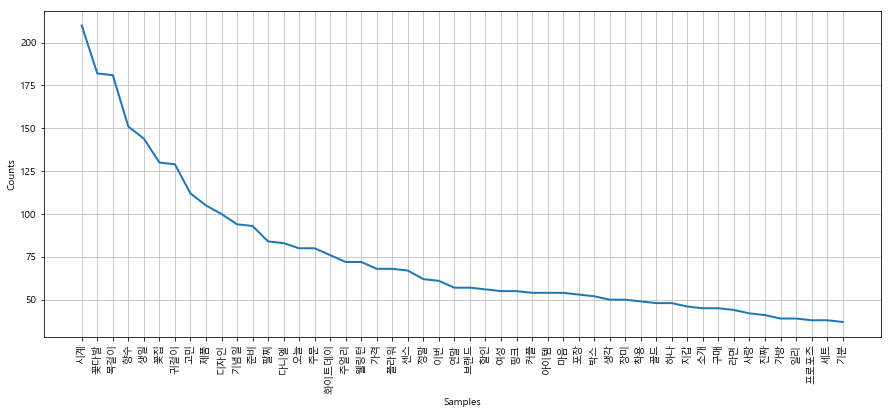

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [47]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

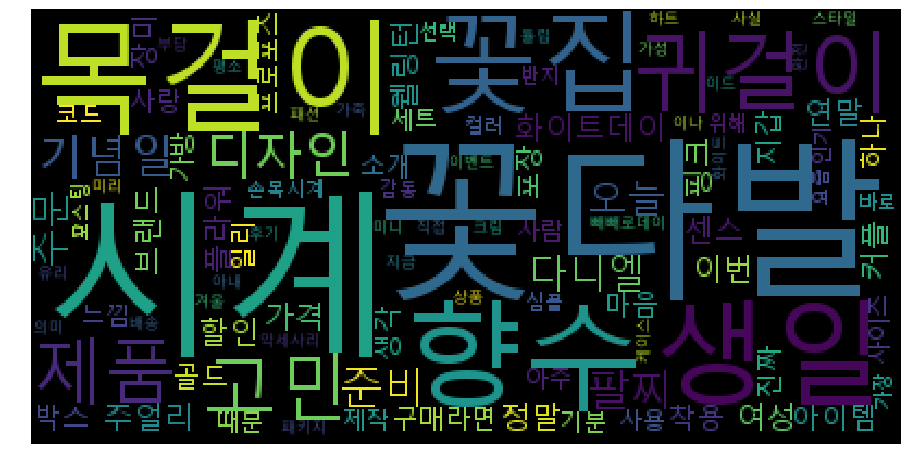

In [48]:
data = ko.vocab().most_common(100)

wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     stopwords = STOPWORDS,
                     background_color = 'black',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()